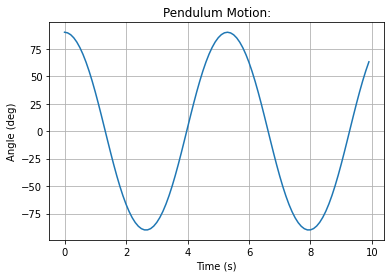

In [13]:
import numpy as np 
import matplotlib.pyplot as plt 

#pendulum_specification
m = 3.0
g = 9.8
mint = 12.0
l = 2.0
initial_angle = 90.0
torque = 0

# Time Step
initial_step = 0
h = 0.1 
final_step = 10.0
t = np.arange(initial_step, final_step, h)
n = len(t) 

y=np.zeros(n)
v=np.zeros(n)

def accel(theta):
    return (torque-(m*g*l/2)*np.sin(theta))/(((m*l**2)/4)+mint)

y[0] = np.radians(initial_angle) 
v[0] = np.radians(0.0)

for i in range(0, n-1): 
    k1y = h*v[i]
    k1v = h*accel(y[i])

    k2y = h*(v[i]+0.5*k1v)
    k2v = h*accel(y[i]+0.5*k1y)

    k3y = h*(v[i]+0.5*k2v)
    k3v = h*accel(y[i]+0.5*k2y)

    k4y = h*(v[i]+k3v)
    k4v = h*accel(y[i]+k3y)

    # Update next value of y 
    y[i+1] = y[i] + (k1y + 2 * k2y + 2 * k3y + k4y) / 6.0 
    v[i+1] = v[i] + (k1v + 2 * k2v + 2 * k3v + k4v) / 6.0

plt.plot(t, np.degrees(y))
plt.title('Pendulum Motion:')
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.grid(True)
plt.show()

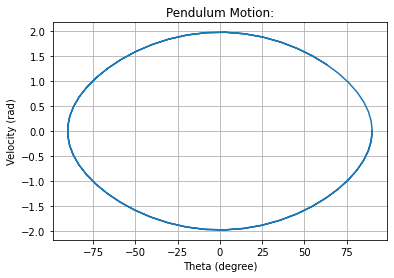

In [14]:
plt.plot(np.degrees(y), v)
plt.title('Pendulum Motion:')
plt.xlabel('Theta (degree)')
plt.ylabel('Velocity (rad)')
plt.grid(True)
plt.show()